<a href="https://colab.research.google.com/github/sravanv-git/Credit-Card-Fraud-Detection/blob/main/Code_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CREDIT CARD FRAUD DETECTION
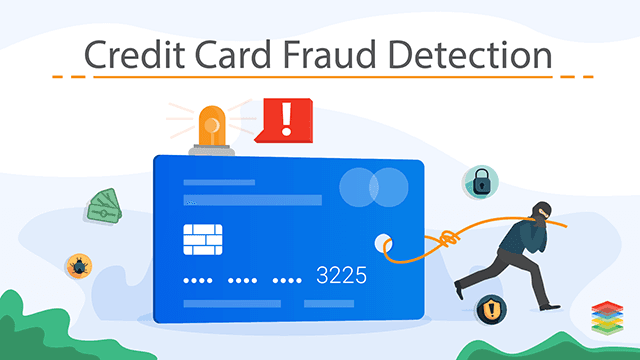

**Data Source** :https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, accuracy_score

In [ ]:

df=pd.read_csv('creditcard.csv')


In [ ]:
df.shape

(11959, 31)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,0.985152,-2.408867,1.373587,1.763579,0.285327,0.945527,-0.250914,0.534074,0.341867,-0.093459,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,0.253297,-2.169046,2.724520,0.955362,0.338823,0.659885,0.381967,0.159690,-0.090632,-0.051795,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,1.133246,-1.689502,2.537282,1.566142,0.200226,0.148113,0.391597,-0.454222,-0.449532,-0.107163,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,14861,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,-0.342078,1.228923,-2.422949,1.080143,1.809726,0.014903,1.083481,-0.313433,0.824736,0.492718,-0.108758,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5933.588719,-0.241530,0.280348,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,-0.222004,0.765820,-1.269198,0.848447,0.699082,-0.127805,-0.008316,0.316889,-0.016717,-0.069244,0.027787,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4448.730907,1.522697,1.308496,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,1.094805,1.169195,1.529064,1.213252,1.240232,0.975537,0.881598,0.965523,0.793982,0.807359,0.590531,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.011783,-0.208614,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,-0.687065,-0.064279,-2.367872,-0.020661,0.078687,-0.707414,-0.495795,-0.182177,-0.450869,-0.551038,-0.149775,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4546.000000,-0.372609,0.286168,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,-0.339972,0.746752,-1.616357,0.914859,0.898178,-0.007462,0.065802,0.296402,0.025779,-0.075870,-0.020930,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10162.250000,1.151550,0.900736,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,0.174952,1.575650,0.086676,1.766764,1.497831,0.537830,0.546496,0.780910,0.459390,0.442998,0.156913,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14861.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
fraud=df[df.Class==1]
valid=df[df.Class==0]

In [ ]:
fraud.Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
valid.Amount.describe()

count    9926.000000
mean       62.919501
std       184.041297
min         0.000000
25%         5.172500
50%        15.950000
75%        51.067500
max      7712.430000
Name: Amount, dtype: float64

We can clearly see that money transaction is more in case of fraud transactions

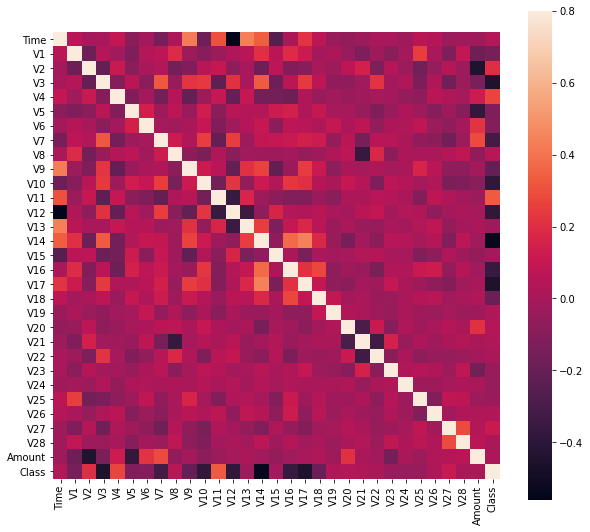

In [ ]:
#corelation matrix
corrmat=df.corr()
fig=plt.figure(figsize=(10,9))
sns.heatmap(corrmat, vmax=0.8,square=True)
plt.show()

In [ ]:
df.Class.value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

In [ ]:
df.dropna(inplace=False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,14834,1.180311,-0.268826,1.373170,-0.623739,-1.237326,-0.495057,-0.909022,-0.000706,2.961146,-1.437185,1.307043,-1.435148,2.303324,1.272459,1.670639,-0.395817,0.579965,0.391157,-0.568806,-0.146870,0.170907,0.974244,-0.036893,0.383235,0.369188,-0.581899,0.098968,0.035401,2.00,0.0
9960,14837,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,0.985152,-2.408867,1.373587,1.763579,0.285327,0.945527,-0.250914,0.534074,0.341867,-0.093459,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,14854,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,0.253297,-2.169046,2.724520,0.955362,0.338823,0.659885,0.381967,0.159690,-0.090632,-0.051795,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,14857,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,1.133246,-1.689502,2.537282,1.566142,0.200226,0.148113,0.391597,-0.454222,-0.449532,-0.107163,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0


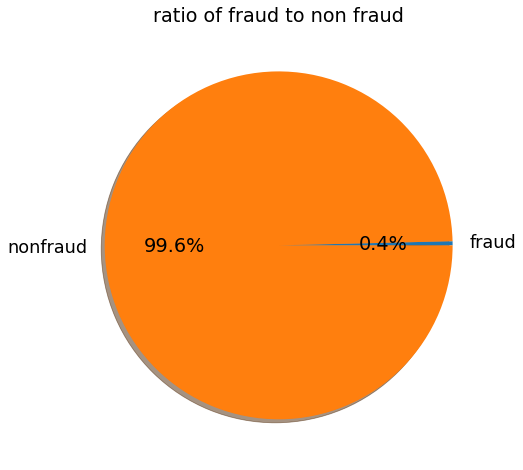

In [ ]:
fraud=len(df[df['Class']==1])
nonfraud=len(df[df['Class']==0])
#data to plot
label=('fraud','nonfraud')
size=(fraud,nonfraud)
#plotting
plt.figure(figsize=(8,8))
#pie diagram
plt.pie(size,labels=label,autopct='%1.1f%%',shadow=True)
plt.title('ratio of fraud to non fraud')
sns.set_context('paper',font_scale=2)

In [ ]:

x=df.drop('Class',axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)



In [ ]:
#dummy prediction is just to see how good is our model compared to dumb model
from sklearn.dummy import DummyClassifier
#only predicts the most frequent class that is nonfraud
dummy=DummyClassifier(strategy='most_frequent').fit(x_train,y_train)

dummy_pred=dummy.predict(x_test)
dummy_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('dummy prediction accuracy score :', accuracy_score(y_test,dummy_pred))
print('all unique_values in dummy-pred:' ,np.unique(dummy_pred) )

dummy prediction accuracy score : 0.9969894631209232
all unique_values in dummy-pred: [0.]


In [ ]:
pd.DataFrame(confusion_matrix(y_test,dummy_pred))

,0,1
0,1987,0
1,6,0


In [ ]:
x=pd.concat([x_train,y_train],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5466,5486,0.967994,-0.071124,0.671607,0.926902,0.175536,1.198111,-0.374224,0.328668,1.641914,-0.782037,1.608275,-1.324555,1.896476,1.428496,0.074053,-1.689718,2.064492,-2.537510,-1.671493,-0.223399,-0.218463,-0.095865,0.160946,-0.652312,0.075623,0.334528,0.019976,0.001077,36.61,0.0
9139,12987,-1.433725,1.252612,1.559610,-0.773629,-0.027703,-0.838198,0.700126,-0.474196,1.223766,-0.444292,1.382862,-1.814025,2.543442,1.139369,-0.126151,-0.172284,0.525106,-0.922140,-1.236789,-0.289337,0.020469,0.043950,0.049393,0.615907,-0.569383,0.608841,-0.971716,0.220053,17.00,0.0
5939,6568,1.054348,0.491801,0.863445,2.480570,0.176703,0.744457,-0.306284,0.310745,0.460671,0.414865,2.413180,-2.321639,0.372323,2.212297,-0.241711,0.406619,0.464346,-0.463786,-1.552495,-0.322549,-0.304613,-0.735665,0.217876,-0.439436,0.006505,-0.258574,-0.012053,0.002942,4.44,0.0
9579,14404,1.061312,0.312606,1.776590,2.946030,-0.721493,0.468417,-0.735360,0.213753,1.405445,0.085226,0.466201,-2.273148,1.364029,1.115647,-0.787174,0.214571,0.728274,-0.453988,-1.525655,-0.263697,-0.190159,-0.124837,0.129221,0.321528,0.149650,-0.071417,0.031517,0.028718,0.76,0.0
1452,1127,-1.380849,-0.145625,0.126665,-2.162818,0.521847,-1.741244,0.019423,0.381790,0.344398,-1.313241,0.859797,0.872693,-0.550424,1.003681,0.388093,-0.316377,-0.316406,0.540977,1.011011,0.205208,0.189500,0.234031,-0.202100,0.041873,-0.080313,-0.137458,0.245276,-0.024124,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,7597,1.117174,0.397727,1.092617,1.583642,-0.654971,-0.960014,-0.038930,-0.296831,1.215385,-0.387387,1.221708,-1.539580,2.708813,1.479039,0.205506,0.133703,0.314754,-0.123391,-0.891210,-0.062790,-0.162261,-0.225338,0.070103,0.858012,0.342787,-0.557002,0.009115,0.038364,36.00,0.0
9160,13074,-2.890989,-1.045900,2.882981,1.109981,3.526932,0.721677,-0.944038,0.205384,0.693370,0.219455,2.987255,-1.682445,1.755522,1.045816,-0.533738,0.240240,0.089498,-1.325574,-4.021062,-1.085986,-0.122281,0.761546,-1.041194,-0.976249,0.027781,-0.120933,-0.047148,-0.609130,10.65,0.0
9859,14528,1.162377,-0.119161,0.856811,0.161125,-0.613345,-0.045259,-0.641747,0.103158,1.524224,-0.385105,2.501686,-1.773134,1.350000,1.766332,0.168659,0.407767,0.339972,0.243972,-0.468468,-0.124856,0.008124,0.267973,0.006648,0.038296,0.093533,1.044329,-0.078824,-0.008585,14.95,0.0
1688,1309,1.350184,-0.783871,-1.430495,-2.989140,1.527236,2.971130,-0.740709,0.768487,2.164742,-1.610228,-0.246187,0.948486,-0.213998,0.087890,0.831510,-1.201833,-0.094035,0.257769,1.829025,0.013168,-0.107405,-0.071687,-0.213479,1.058844,1.034843,-0.681633,0.079148,0.013178,11.76,0.0


In [ ]:
#upsampling for equalling majority and minority classes
from sklearn.utils import resample
#splitting data
df_minority=df[df.Class==1]
df_majority=df[df.Class==0]
#upsampling minority
df_minority_upsamp=resample(df_minority,replace=True,     # sample with replacement
                              n_samples=len(df[df.Class==0]),    # to match majority class
                                 random_state=123) # reproducible results
df_upsamp=pd.concat([df_majority,df_minority_upsamp])

In [ ]:
#both should have equal counts
df_upsamp.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

**Applying logistic regression on our new data set**


In [ ]:
from sklearn.linear_model import LogisticRegression
df_upsamp.dropna(inplace=True)
X=df_upsamp.drop('Class',axis=1)
y=df_upsamp['Class']
logistic_upsamp=LogisticRegression(solver='liblinear').fit(X, y)
#predicting on intial test sample
logistic_upsamp_pred=logistic_upsamp.predict(x_test)
print('accuracy score:', accuracy_score(y_test,logistic_upsamp_pred))

accuracy score: 0.994982438534872


In [ ]:
from sklearn.metrics import classification_report
#classification report for above model
print(classification_report(y_test,logistic_upsamp_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1987
         1.0       0.38      1.00      0.55         6

    accuracy                           0.99      1993
   macro avg       0.69      1.00      0.77      1993
weighted avg       1.00      0.99      1.00      1993



It is able to identify 0 precisely, bit identify 1 with less precision.

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,logistic_upsamp_pred))

,0,1
0,2472,11
1,0,9


This model is pretty fine and it detects fraud cases precisely.

**Let us see with other algorithms**

In [ ]:
#Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
df.dropna(inplace=True)
X=df.drop('Class',axis=1)
y=df.Class
X_train,X_test,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=27)
oversample = RandomOverSampler(sampling_strategy='minority')
X_train,y_train1=oversample.fit_resample(X_train, y_train1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
oversampler=LogisticRegression(solver='liblinear').fit(X_train,y_train1)
oversampler_pred=oversampler.predict(X_test)
print('acuracy_score:',accuracy_score(y_test1,oversampler_pred))

acuracy_score: 0.9935768767563228


In [ ]:
pd.DataFrame(confusion_matrix(y_test1,oversampler_pred))

,0,1
0,2468,13
1,3,7


In [ ]:
print(classification_report(y_test1,oversampler_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2481
         1.0       0.35      0.70      0.47        10

    accuracy                           0.99      2491
   macro avg       0.67      0.85      0.73      2491
weighted avg       1.00      0.99      0.99      2491



In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
df.dropna(inplace=True)
x=df.drop('Class',axis=1)
y=df.Class
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=27)
randf=RandomForestClassifier(n_estimators=10).fit(x1,y1)

randf_pred=randf.predict(x2)

#print('accuracy_score:',accuracy_score(y2,randf_pred))
#pd.DataFrame(confusion_matrix(y2,randf_pred))

In [ ]:
pd.DataFrame(confusion_matrix(y2,randf_pred))

,0,1
0,1984,0
1,2,7


In [ ]:
accuracy_score(y2,randf_pred)

0.9989964877069744

In [ ]:
print(classification_report(y2,randf_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



In [ ]:
#on the whole data set
df.dropna(inplace=False)
pred=randf.predict(df.drop('Class',axis=1))
accuracy_score(df.Class,pred)
pd.DataFrame(confusion_matrix(df.Class,pred))

,0,1
0,11906,0
1,4,48


**The  results gives us an acuuracy of 92% in detection of Actual Fraud cases and 0 cases where the model predicts non fraud as Fraud.**